In [41]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
#judge.tail()


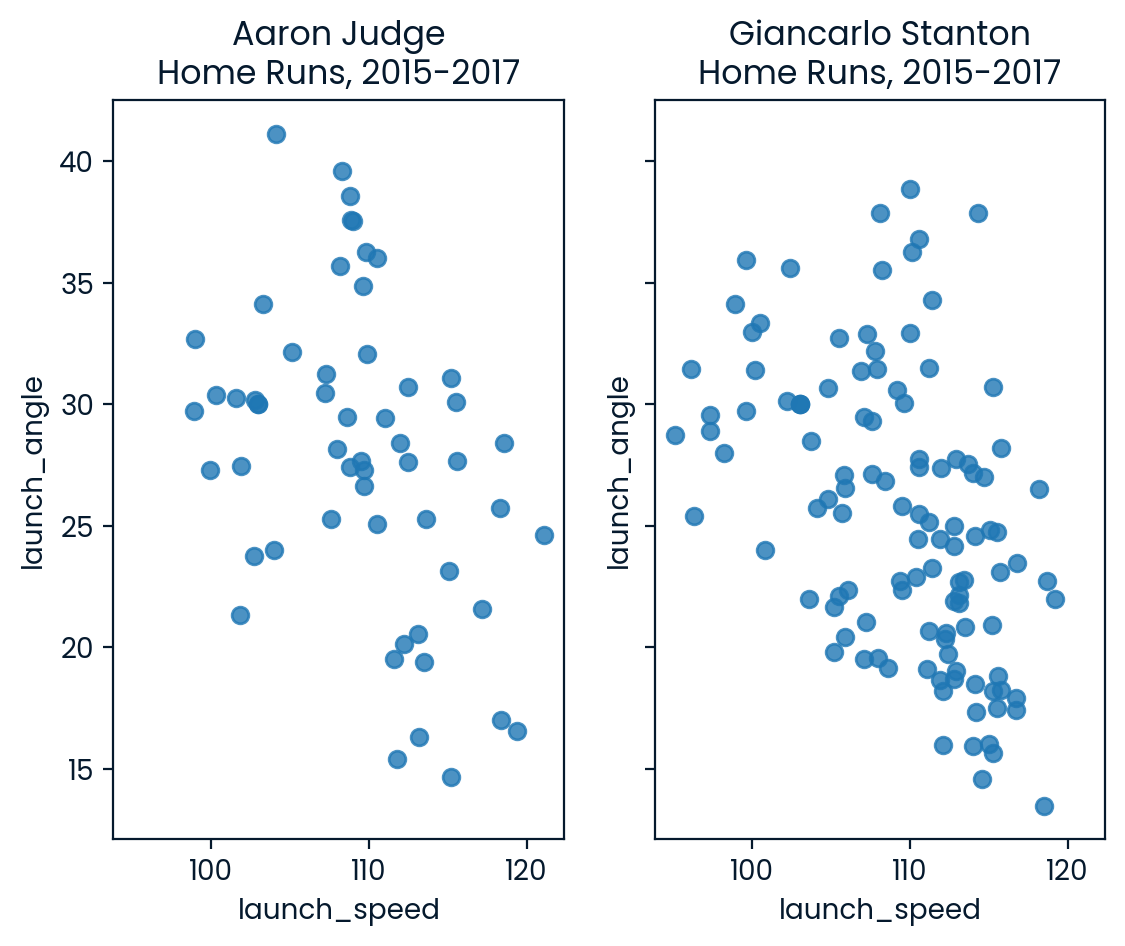

91.69999999999999
89.5


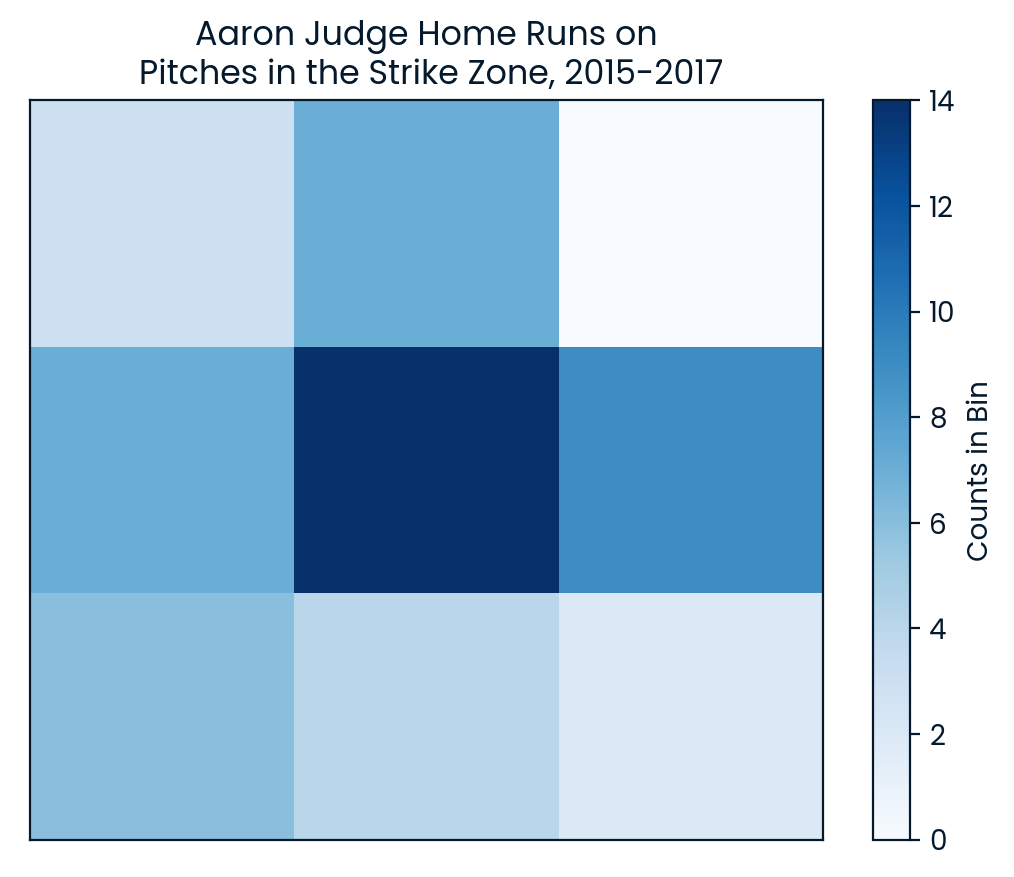

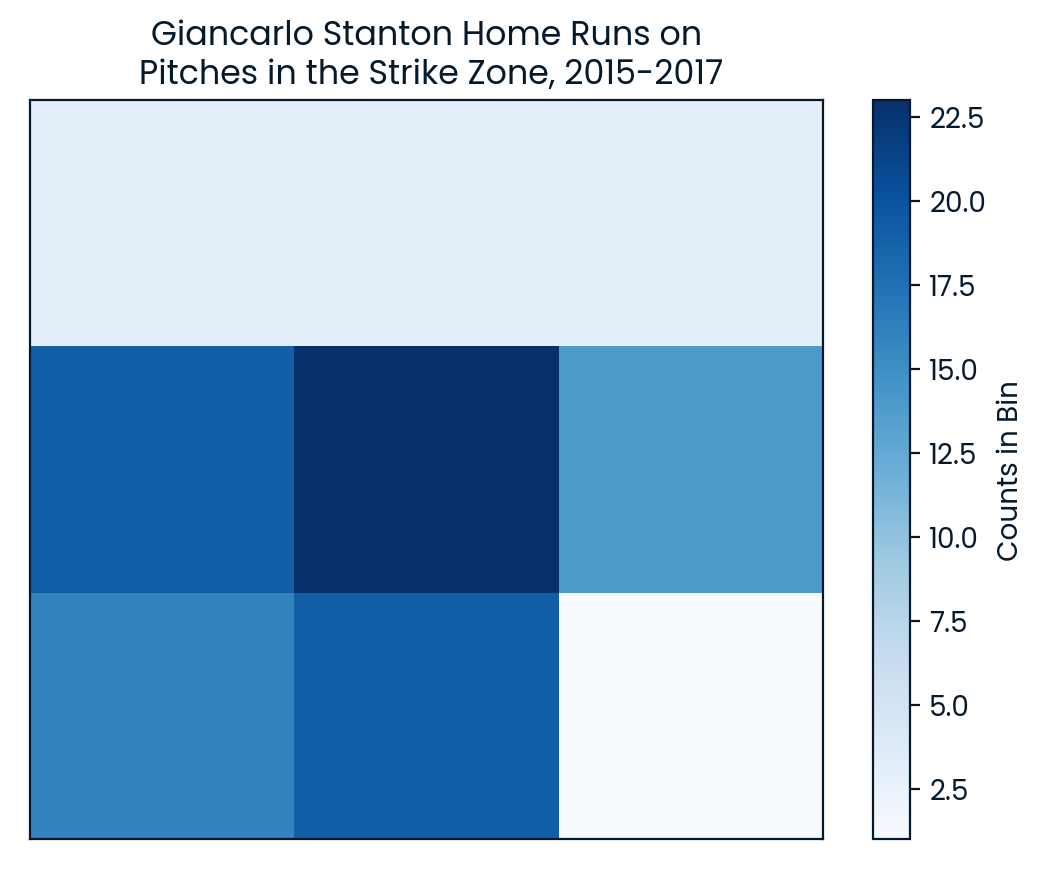

In [42]:
# Start coding here. Use as many cells as you like!

j_events_2017 = judge[judge['game_year'] == 2017]['events']
judge_events_2017=events_2017.value_counts().sort_values(ascending=False)

s_events_2017=stanton[stanton["game_year"]==2017]["events"]
stanton_events_2017=s_events_2017.value_counts().sort_values(ascending=False)


judge_hr = judge[judge['events'] == 'home_run']
stanton_hr = stanton[stanton['events'] == 'home_run']

fig1, ax1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=judge_hr, ax=ax1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_speed', y='launch_angle', fit_reg=False, color='tab:blue', data=stanton_hr, ax=ax1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')
player_hr="Stanton"
plt.show()

judge_hr_speed=judge_hr["release_speed"].median()
stanton_hr_speed=stanton_hr["release_speed"].median()
print(judge_hr_speed)
print(stanton_hr_speed)
player_fast="Judge"

judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

plt.hist2d(judge_strike_hr.zone_x, judge_strike_hr.zone_y, bins = 3, cmap='Blues')
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')
plt.show()

stanton_strike_hr=stanton_hr.copy().loc[stanton_hr.zone<=9]
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)

plt.hist2d(stanton_strike_hr.zone_x, stanton_strike_hr.zone_y, bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

plt.show()